<a href="https://colab.research.google.com/github/444015039/lab0-443-444015039/blob/main/Yet_another_copy_of_%D9%85%D8%B4%D8%B1%D9%88%D8%B9_%D8%AA%D8%AD%D9%84%D9%8A%D9%84_%D8%AC%D8%B2%D8%A1_%D8%A7%D9%84%D8%AA%D8%A7%D9%86%D9%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# 4.1. Import library:

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


stop_words = stopwords.words()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:




# Define the path to the CSV file in Google Drive
file_path = '/content/Reviews.csv'

# Load the data
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())



   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Id,568454.0,2.842275e+05,1.640987e+05,1.0,1.421142e+05,2.842275e+05,4.263408e+05,5.684540e+05
HelpfulnessNumerator,568454.0,1.743817e+00,7.636513e+00,0.0,0.000000e+00,0.000000e+00,2.000000e+00,8.660000e+02
HelpfulnessDenominator,568454.0,2.228810e+00,8.289740e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,9.230000e+02
Score,568454.0,4.183199e+00,1.310436e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Time,568454.0,1.296257e+09,4.804331e+07,939340800.0,1.271290e+09,1.311120e+09,1.332720e+09,1.351210e+09


In [ ]:
column_names = df.columns
print(column_names)


Index(['QUR2YY3', 'Wendy O', '1', '1.1', '5', '1296086400',
       'Tassimo's Best Brew',
       'This is my favorite brew for my Tassimo.  It has good flavor - robust but not too strong for first thing in the morning. What I like the most is that it makes a 16 ounce cup which is great for morning. As far as I know, it's the only T-Disc that makes a cup that large.  Enjoy!<br /><br />(Updated 5/15/11) I continue to be surprised that there are people who call this brew "weak", "metallic-tasting", and "watery".  I like a fairly strong cup of coffee and have always found this to be pleasant. So, after numerous cups and many re-orders, I still find this to be my go-to brew in the morning. I also continue to wish that other brands and brews were available in this larger size.'],
      dtype='object')


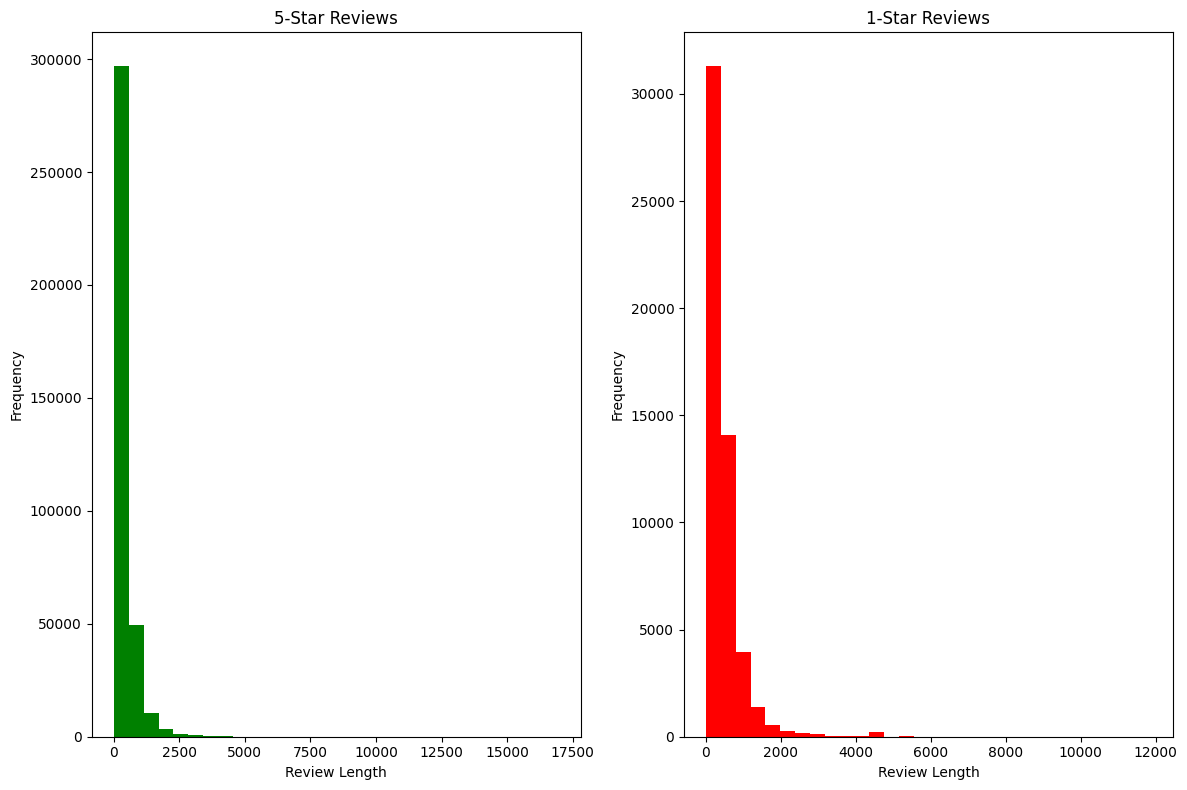

In [ ]:
import matplotlib.pyplot as plt

# Create subplots for reviews with 5-star and 1-star ratings
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Plot histogram for 5-star reviews (Positive reviews)
ax1.hist(df[df['Score'] == 5]['Text'].str.len(), bins=30, color='green')
ax1.set_title('5-Star Reviews')
ax1.set_xlabel('Review Length')
ax1.set_ylabel('Frequency')

# Plot histogram for 1-star reviews (Negative reviews)
ax2.hist(df[df['Score'] == 1]['Text'].str.len(), bins=30, color='red')
ax2.set_title('1-Star Reviews')
ax2.set_xlabel('Review Length')
ax2.set_ylabel('Frequency')

# Show the plots
plt.tight_layout()


In [ ]:
df['Score'].value_counts()


,count
Score,
5,363122
4,80655
1,52268
3,42640
2,29769


<Axes: >

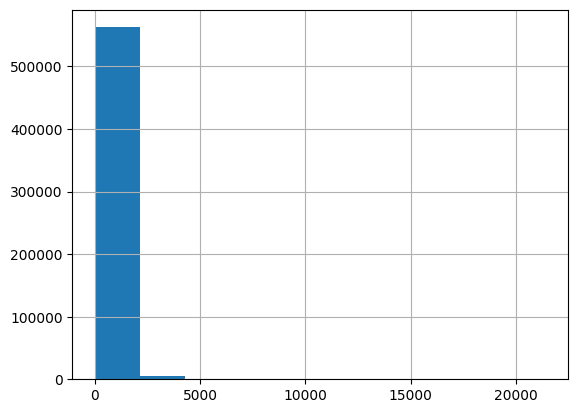

In [ ]:
df['Text'].str.len().hist()


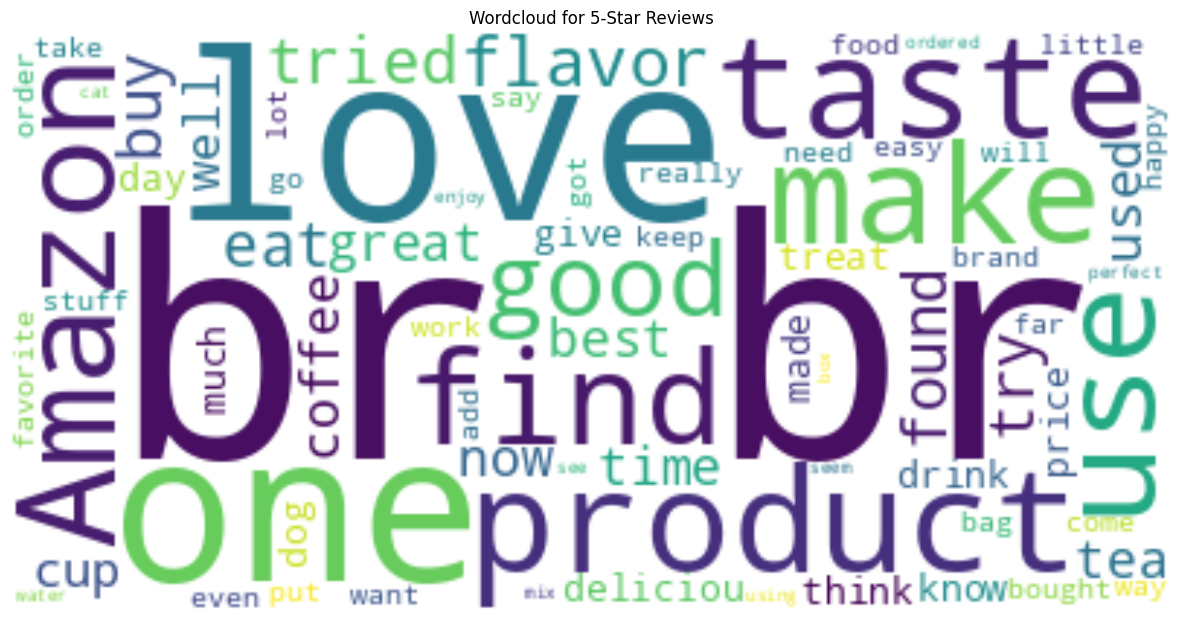

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# استخراج نصوص المراجعات التي تحتوي على تقييم 5
text = " ".join(review for review in df[df['Score'] == 5]['Text'])

# إنشاء سحابة الكلمات
wordcloud = WordCloud(background_color="white").generate(text)

# عرض سحابة الكلمات
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for 5-Star Reviews')
plt.show()


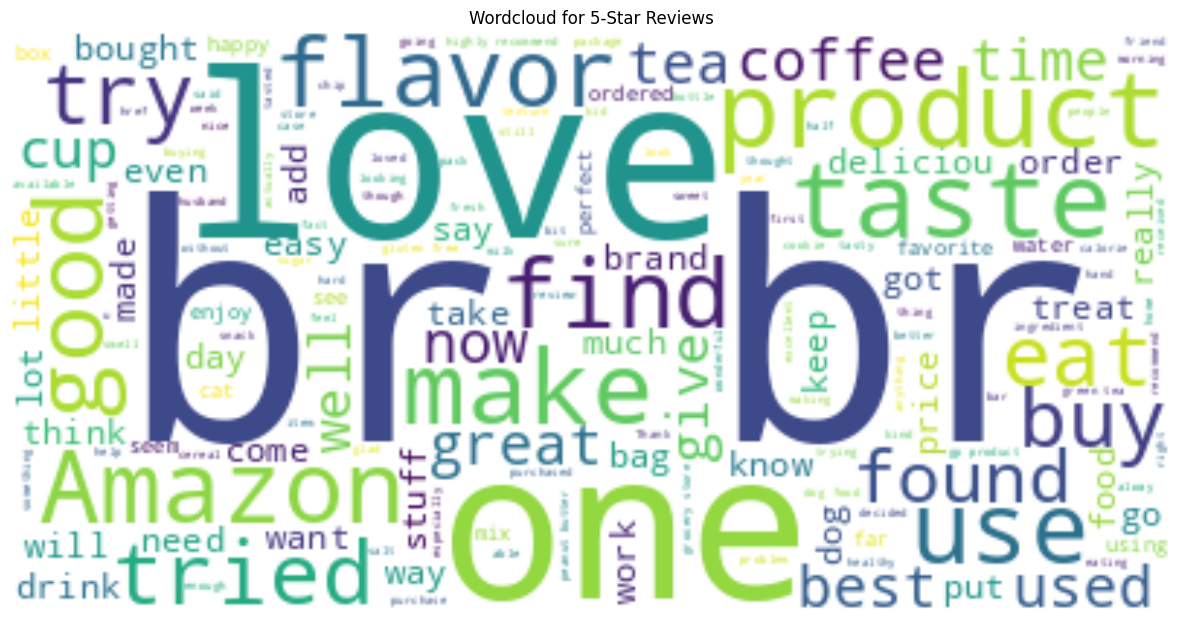

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# استخراج نصوص المراجعات التي تحتوي على تقييم 5
text = " ".join(review for review in df[df['Score'] == 5]['Text'])

# إنشاء سحابة الكلمات
wordcloud = WordCloud(background_color="white").generate(text)

# عرض سحابة الكلمات
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for 5-Star Reviews')
plt.show()


In [ ]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [ ]:
import re
import string

# دالة تنظيف النصوص
def cleaning(text):
    if isinstance(text, str):  # التحقق إذا كانت القيمة نصية
        # تحويل الأحرف إلى أحرف صغيرة وإزالة الروابط والعلامات الخاصة وعلامات الترقيم
        text = text.lower()  # تحويل النص إلى أحرف صغيرة
        text = re.sub('https?://\S+|www\.\S+', '', text)  # إزالة الروابط
        text = re.sub(r"\b\d+\b", "", text)  # إزالة الأرقام
        text = re.sub('<.*?>+', '', text)  # إزالة العلامات الخاصة
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # إزالة علامات الترقيم
        text = re.sub('\n', '', text)  # إزالة الانتقالات إلى السطر الجديد
        text = re.sub('[’“”…]', '', text)  # إزالة بعض الرموز الخاصة

        # إزالة الرموز التعبيرية
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # الرموز التعبيرية
                                   u"\U0001F300-\U0001F5FF"  # الرموز والرموز التصويرية
                                   u"\U0001F680-\U0001F6FF"  # رموز النقل والخرائط
                                   u"\U0001F1E0-\U0001F1FF"  # الأعلام
                                   "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)

        # توسيع الصيغ المختصرة:
        text = re.sub("isn't", 'is not', text)
        text = re.sub("he's", 'he is', text)
        text = re.sub("wasn't", 'was not', text)
        text = re.sub("there's", 'there is', text)
        text = re.sub("couldn't", 'could not', text)
        text = re.sub("won't", 'will not', text)
        text = re.sub("they're", 'they are', text)
        text = re.sub("she's", 'she is', text)
        text = re.sub("There's", 'there is', text)
        text = re.sub("wouldn't", 'would not', text)
        text = re.sub("haven't", 'have not', text)
        text = re.sub("That's", 'That is', text)
        text = re.sub("you've", 'you have', text)
        text = re.sub("He's", 'He is', text)
        text = re.sub("what's", 'what is', text)
        text = re.sub("weren't", 'were not', text)
        text = re.sub("we're", 'we are', text)
        text = re.sub("hasn't", 'has not', text)
        text = re.sub("you'd", 'you would', text)
        text = re.sub("shouldn't", 'should not', text)
        text = re.sub("let's", 'let us', text)
        text = re.sub("they've", 'they have', text)
        text = re.sub("You'll", 'You will', text)
        text = re.sub("i'm", 'i am', text)
        text = re.sub("we've", 'we have', text)
        text = re.sub("it's", 'it is', text)
        text = re.sub("don't", 'do not', text)
        text = re.sub("that´s", 'that is', text)
        text = re.sub("I´m", 'I am', text)
        text = re.sub("it’s", 'it is', text)
        text = re.sub("she´s", 'she is', text)

    return text

# تطبيق الدالة على عمود Text في البيانات
df['cleaned_Text'] = df['Text'].apply(cleaning)



In [ ]:
df.rename(columns={'Text':'review'}, inplace = True)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,review,cleaned_Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wide...
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,great for sesame chickenthis is a good if not ...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,im disappointed with the flavor the chocolate ...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",these stars are small so you can give of thos...
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,these are the best treats for training and rew...


In [ ]:
dt = pd.DataFrame(df)
dt['review']=df['review']
dt

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,review,cleaned_Text,no_sw
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,I bought Vitality canned food products found q...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...,Product arrived labeled Jumbo Salted Peanuts.....
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this is a confection that has been around a fe...,"This confection centuries. It light, pillowy c..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,If secret ingredient Robitussin I believe I fo...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wide...,Great taffy great price. There wide assortment...
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,great for sesame chickenthis is a good if not ...,Great sesame chicken..this resturants I eaten ...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,im disappointed with the flavor the chocolate ...,I'm disappointed flavor. The chocolate notes e...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",these stars are small so you can give of thos...,"These stars small, give 10-15 training session..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,these are the best treats for training and rew...,These BEST treats training rewarding grooming....


In [ ]:
!pip install swifter


^C


In [ ]:
pip install modin[dask]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: dask
    Found existing installation: dask 2024.8.2
    Uninstalling dask-2024.8.2:
      Successfully uninstalled dask-2024.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-expr 1.1.13 requires dask==2024.8.2, but you have dask 2024.10.0 which is incompatible.


In [ ]:
import modin.pandas as pd  # استبدل pandas بـ modin
stop_words_set = set(stop_words)

# استخدام modin بنفس الطريقة التي تستخدمها مع pandas
dt['no_sw'] = dt['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words_set]))


In [ ]:
dt

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,review,cleaned_Text,no_sw
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,I bought Vitality canned food products found q...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...,Product arrived labeled Jumbo Salted Peanuts.....
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this is a confection that has been around a fe...,"This confection centuries. It light, pillowy c..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,If secret ingredient Robitussin I believe I fo...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wide...,Great taffy great price. There wide assortment...
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,great for sesame chickenthis is a good if not ...,Great sesame chicken..this resturants I eaten ...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,im disappointed with the flavor the chocolate ...,I'm disappointed flavor. The chocolate notes e...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",these stars are small so you can give of thos...,"These stars small, give 10-15 training session..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,these are the best treats for training and rew...,These BEST treats training rewarding grooming....


In [ ]:
from collections import Counter
import pandas as pd

# عد الكلمات الأكثر تكرارًا في عمود 'no_sw' بعد إزالة الكلمات الشائعة
cnt = Counter()
for review in dt["no_sw"].values:
    for word in review.split():
        cnt[word] += 1

# الحصول على أكثر 10 كلمات تكرارًا
most_common_words = cnt.most_common(10)

# تحويل النتيجة إلى DataFrame
temp = pd.DataFrame(most_common_words, columns=['word', 'count'])

# عرض DataFrame الناتج
print(temp)


      word    count
0        I  1388076
1    /><br   257584
2      The   194293
3     This   139552
4       It   137737
5    taste   123778
6    great   107377
7   coffee   105417
8     love   104147
9  product    98047


In [ ]:
px.bar(temp, x="count", y="word", title='Commmon Words in review', orientation='h',
             width=700, height=700)

In [ ]:
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
dt["wo_stopfreq"] = dt["no_sw"].apply(lambda review: remove_freqwords(review))
dt.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,review,cleaned_Text,no_sw,wo_stopfreq
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,I bought Vitality canned food products found q...,bought Vitality canned food products found qua...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...,Product arrived labeled Jumbo Salted Peanuts.....,Product arrived labeled Jumbo Salted Peanuts.....
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this is a confection that has been around a fe...,"This confection centuries. It light, pillowy c...","confection centuries. light, pillowy citrus ge..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,If secret ingredient Robitussin I believe I fo...,If secret ingredient Robitussin believe found ...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wide...,Great taffy great price. There wide assortment...,Great taffy price. There wide assortment yummy...


In [ ]:
# عرض العمود المعدل
dt['no_sw'].loc[6]



"This saltwater taffy great flavors soft chewy. Each candy individually wrapped well. None candies stuck together, happen expensive version, Fralinger's. Would highly recommend candy! I served beach-themed party loved it!"

In [ ]:
dt['wo_stopfreq'].loc[6]


"saltwater taffy flavors soft chewy. Each candy individually wrapped well. None candies stuck together, happen expensive version, Fralinger's. Would highly recommend candy! served beach-themed party loved it!"

In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# استيراد مكتبة WordNetLemmatizer من مكتبة NLTK
# WordNetLemmatizer هو كائن يستخدم لتحويل الكلمات إلى شكلها الأساسي (lemma).
wordnet_lem = WordNetLemmatizer()

# تطبيق التمثيل الأساسي (Lemmatization) على النصوص في عمود "wo_stopfreq"
# هذا الكود يقوم بتحويل كل كلمة في النص إلى شكلها الأساسي
dt['wo_stopfreq_lem'] = dt['wo_stopfreq'].apply(wordnet_lem.lemmatize)

# عرض إطار البيانات بعد إضافة العمود الجديد "wo_stopfreq_lem"
# هذا العمود يحتوي على النصوص بعد إزالة الكلمات المتكررة وتطبيق التمثيل الأساسي
dt


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,review,cleaned_Text,no_sw,wo_stopfreq,wo_stopfreq_lem
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,I bought Vitality canned food products found q...,bought Vitality canned food products found qua...,bought Vitality canned food products found qua...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...,Product arrived labeled Jumbo Salted Peanuts.....,Product arrived labeled Jumbo Salted Peanuts.....,Product arrived labeled Jumbo Salted Peanuts.....
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this is a confection that has been around a fe...,"This confection centuries. It light, pillowy c...","confection centuries. light, pillowy citrus ge...","confection centuries. light, pillowy citrus ge..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,If secret ingredient Robitussin I believe I fo...,If secret ingredient Robitussin believe found ...,If secret ingredient Robitussin believe found ...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wide...,Great taffy great price. There wide assortment...,Great taffy price. There wide assortment yummy...,Great taffy price. There wide assortment yummy...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,great for sesame chickenthis is a good if not ...,Great sesame chicken..this resturants I eaten ...,Great sesame chicken..this resturants eaten at...,Great sesame chicken..this resturants eaten at...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,im disappointed with the flavor the chocolate ...,I'm disappointed flavor. The chocolate notes e...,I'm disappointed flavor. chocolate notes espec...,I'm disappointed flavor. chocolate notes espec...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",these stars are small so you can give of thos...,"These stars small, give 10-15 training session...","These stars small, give 10-15 training session...","These stars small, give 10-15 training session..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,these are the best treats for training and rew...,These BEST treats training rewarding grooming....,These BEST treats training rewarding grooming....,These BEST treats training rewarding grooming....


In [ ]:
# افترض أن dt هي DataFrame موجودة مسبقًا
nb = dt.drop(columns=[ 'no_sw', 'wo_stopfreq'])  # حذف الأعمدة غير المرغوب فيها



In [ ]:
tokenized_review=nb['review'].apply(lambda x: x.split())
tokenized_review.head(5)

,review
0,"[I, have, bought, several, of, the, Vitality, ..."
1,"[Product, arrived, labeled, as, Jumbo, Salted,..."
2,"[This, is, a, confection, that, has, been, aro..."
3,"[If, you, are, looking, for, the, secret, ingr..."
4,"[Great, taffy, at, a, great, price., There, wa..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(nb['review'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [ ]:
# تحويل قيم sentiment إلى 0 (سلبية) و1 (إيجابية)
nb.Score = [0 if each <= 2 else 1 for each in nb.Score]



In [ ]:

# استيراد المكتبات اللازمة
import pandas as pd  # مكتبة التعامل مع البيانات
from sklearn.naive_bayes import BernoulliNB  # نموذج Bernoulli Naive Bayes
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # تقييم النموذج
from sklearn.model_selection import train_test_split  # تقسيم البيانات

In [ ]:
from sklearn.model_selection import train_test_split
X=text_counts
y=nb['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

ComplementNB()

In [ ]:
from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

ComplementNB model accuracy is 87.49%
------------------------------------------------
       0      1
0  13112   3396
1  10828  86355
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.79      0.65     16508
           1       0.96      0.89      0.92     97183

    accuracy                           0.87    113691
   macro avg       0.75      0.84      0.79    113691
weighted avg       0.90      0.87      0.88    113691



In [ ]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 89.87%
------------------------------------------------
Confusion Matrix:
       0      1
0  11065   5443
1   6077  91106
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66     16508
           1       0.94      0.94      0.94     97183

    accuracy                           0.90    113691
   macro avg       0.79      0.80      0.80    113691
weighted avg       0.90      0.90      0.90    113691



In [ ]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

BernoulliNB model accuracy = 66.18%
------------------------------------------------
Confusion Matrix:
      0    1     2     3      4
0  5545  419   489   286   3794
1  1100  837   718   503   2817
2   768  197  2041  1280   4112
3   546  131   881  4877   9786
4  1576  334  1670  7044  61940
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.53      0.55     10533
           2       0.44      0.14      0.21      5975
           3       0.35      0.24      0.29      8398
           4       0.35      0.30      0.32     16221
           5       0.75      0.85      0.80     72564

    accuracy                           0.66    113691
   macro avg       0.49      0.41      0.43    113691
weighted avg       0.63      0.66      0.64    113691



In [ ]:
!pip install --upgrade scikit-learn


0.9114495556696698 0.9114480640505658 0.17790285739143244


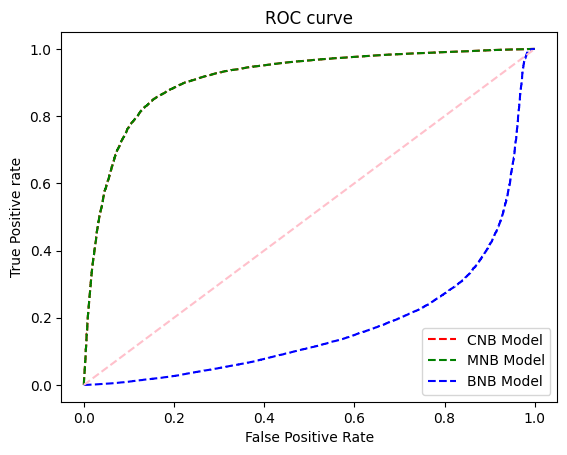

In [ ]:
from sklearn.metrics import roc_curve

# predict probabilities for CNB, MNB, BNB models:
CNB_prob = CNB.predict_proba(X_test)
MNB_prob = MNB.predict_proba(X_test)
BNB_prob = BNB.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, CNB_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, MNB_prob[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, BNB_prob[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
from sklearn.metrics import roc_auc_score
auc_CNB = roc_auc_score(y_test, CNB_prob[:,1])
auc_MNB = roc_auc_score(y_test, MNB_prob[:,1])
auc_BNB = roc_auc_score(y_test, BNB_prob[:,1])
print(auc_CNB, auc_MNB,auc_BNB)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='CNB Model')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='MNB Model')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='BNB Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_twograms = CountVectorizer(stop_words='english',ngram_range = (2,2),tokenizer = token.tokenize)
text_counts_twograms = cv_twograms.fit_transform(nb['review'])

X_train, X_test, y_train, y_test = train_test_split(text_counts_twograms, nb['Score'], test_size=0.20,random_state=30)

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print('model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')

model accuracy is 90.89%


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(nb['review'])

In [ ]:
#fitting the model with MNB
MNB.fit(X_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(X_test), y_test)

print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

accuracy_score_mnb = 90.89%


In [ ]:
#fitting the model with BNB
BNB.fit(X_train, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(X_test), y_test)
print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

accuracy_score_bnb = 85.87%
